In [3]:
!pip install altair
!pip install vega
!pip install vega_datasets

ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/home/son/anaconda3/lib/python3.6/site-packages/altair-4.1.0.dist-info/METADATA'



ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "/home/son/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/home/son/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/son/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/home/son/anaconda3/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another excepti

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import altair as alt

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
hpi_url = 'https://bit.ly/33aaGm7'
df = pd.read_csv(hpi_url, sep='\t')

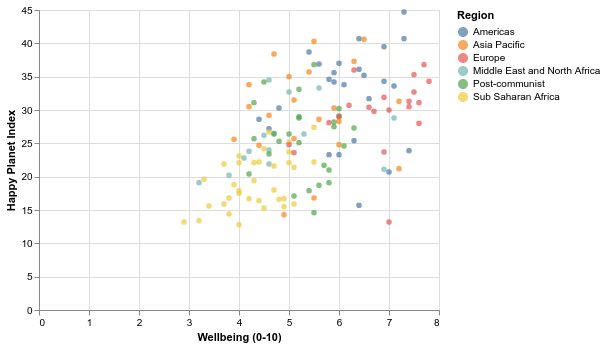

In [4]:
# hover and tooltip in altair
alt.Chart(df).mark_circle().encode(
        x='Wellbeing (0-10):Q',
        y='Happy Planet Index:Q',
        color='Region:N',
        tooltip=['Country','Region','Wellbeing (0-10)',
                'Happy Planet Index','Life Expectancy (years)'])

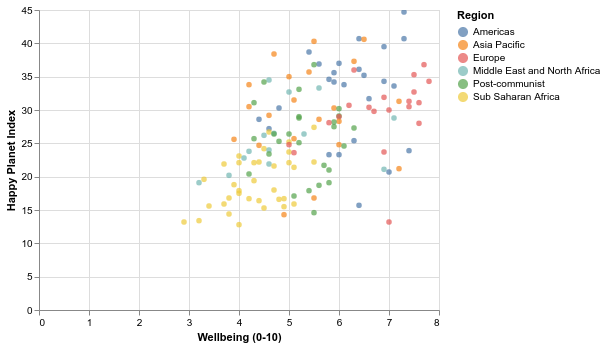

In [5]:
# Interactive added
# zoom feature
alt.Chart(df).mark_circle().encode(
        x='Wellbeing (0-10):Q',
        y='Happy Planet Index:Q',
        color='Region:N',
        tooltip=['Country','Region','Wellbeing (0-10)',
                'Happy Planet Index','Life Expectancy (years)']).interactive()

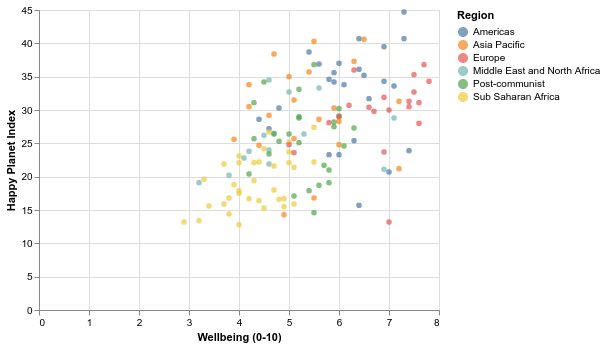

In [6]:
# add_selection
selected_area = alt.selection_interval()
alt.Chart(df).mark_circle().encode(
x='Wellbeing (0-10):Q',
y='Happy Planet Index:Q',
color='Region:N'
).add_selection(
    selected_area
)


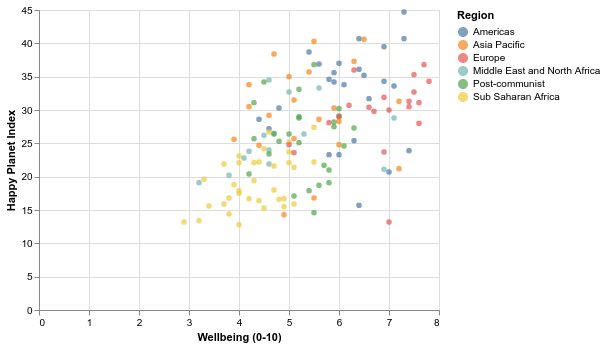

In [7]:
# change the color parameter to include the altair 
# selection condition
selected_area = alt.selection_interval()
alt.Chart(df).mark_circle().encode(
            x='Wellbeing (0-10):Q',
            y='Happy Planet Index:Q',
            color=alt.condition(selected_area, 'Region:N',
                               alt.value('lightgray'))
).add_selection(selected_area)

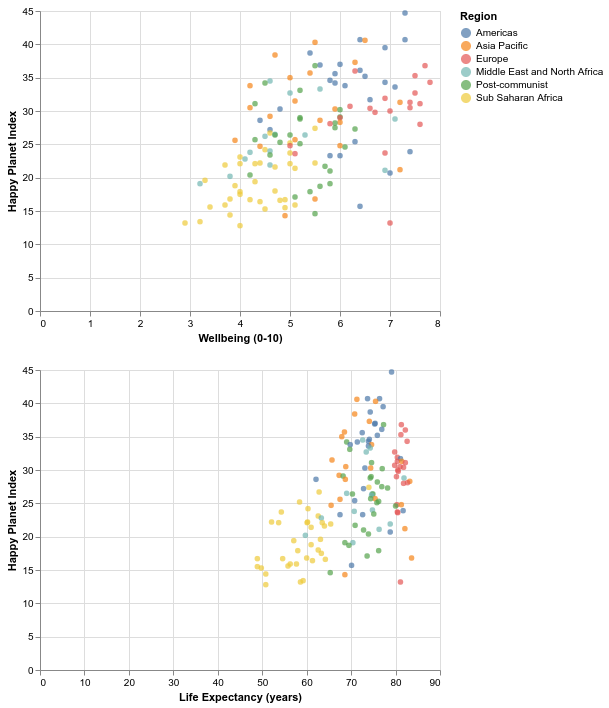

In [8]:
# Multiple plots
chart = alt.Chart(df).mark_circle().encode(
            y='Happy Planet Index',
            color=alt.condition(selected_area, 'Region', alt.
            value('lightgray'))
            ).add_selection(
                            selected_area
                        )


chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life Expectancy (years)')

# vertically concatenate chart1, chart2
alt.vconcat(chart1, chart2)

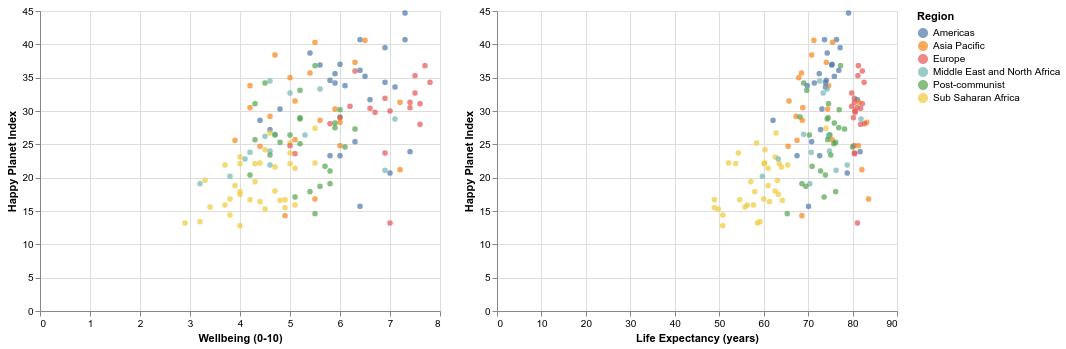

In [9]:
# horizontally concatenate chart1, chart2
alt.hconcat(chart1, chart2)

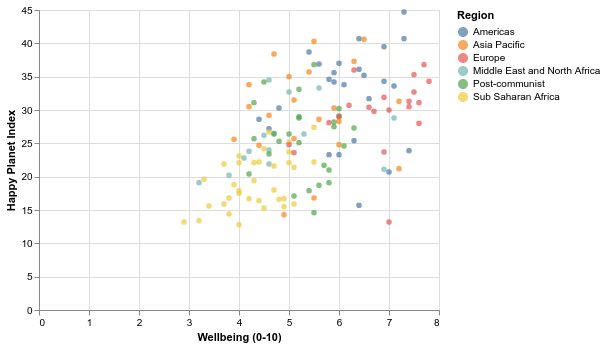

In [10]:
# Select points from drop-down list
input_dropdown = alt.binding_select(options=list(
                    set(df.Region)))
selected_points = alt.selection_single(fields=['Region'],
                                      bind=input_dropdown,
                                      name='Select')
color = alt.condition(selected_points,
                     alt.Color('Region:N'),
                     alt.value('lightgray'))
alt.Chart(df).mark_circle().encode(
                x='Wellbeing (0-10):Q',
                y='Happy Planet Index:Q',
                color=color,
                tooltip='Region:N'
                ).add_selection(
                    selected_points)

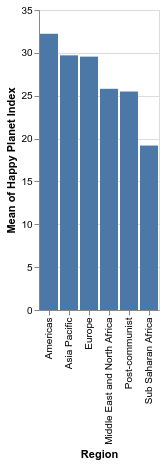

In [11]:
# bar plot
alt.Chart(df).mark_bar().encode(
                    x='Region:N',
                    y='mean(Happy Planet Index):Q')

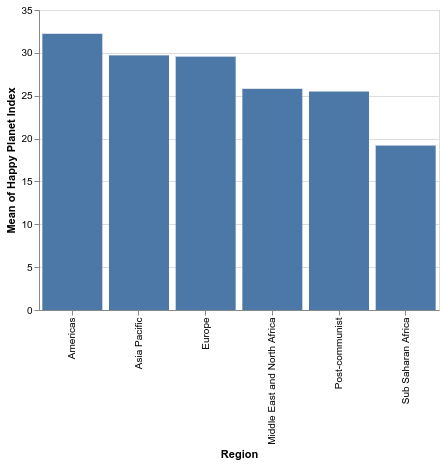

In [14]:
# make the plot wider
alt.Chart(df).mark_bar().encode(
                x='Region:N',
                y='mean(Happy Planet Index):Q'
                ).properties(width=400)

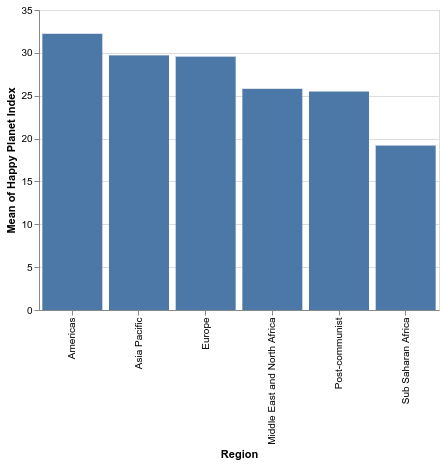

In [19]:
# make the plot interactive
alt.Chart(df).mark_bar().encode(
                x='Region:N',
                y='mean(Happy Planet Index):Q'
                ).properties(width=400).interactive()

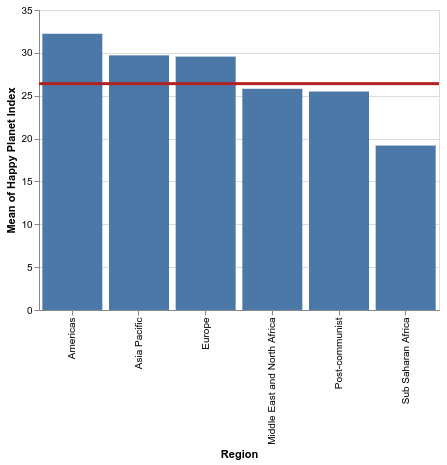

In [20]:
# two layers
bars = alt.Chart().mark_bar().encode(
                        x='Region:N',
                        y='mean(Happy Planet Index):Q',
                        ).properties(width=400)

line = alt.Chart().mark_rule(color='firebrick').encode(
                        y='mean(Happy Planet Index):Q',
                        size=alt.SizeValue(3))

alt.layer(bars, line, data=df)